# Kannada MNIST

In [5]:
import pandas as pd
import numpy as np

In [24]:
train = pd.read_csv("train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
train.label

0        0
1        1
2        2
3        3
4        4
        ..
59995    5
59996    6
59997    7
59998    8
59999    9
Name: label, Length: 60000, dtype: int64

In [12]:
test = pd.read_csv("test.csv")
test.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
len(test)

5000

In [13]:
a = test["id"]

In [14]:
del test["id"]

In [15]:
train.columns = [i for i in range(0, 785)]
train = np.array(train)

test.columns = [i for i in range(0, 784)]
test = np.array(test)

img_rows, img_cols = 28, 28
num_classes = 10

num_images = test.shape[0]
test_images = test.reshape(num_images, img_rows, img_cols, 1)
test_images = test_images / 255

def prep_data(raw_data):
    
    out_y = raw_data[:, 0]    
    
    x = raw_data[:,1:]
    num_images = raw_data.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    
    return out_x, out_y

x, y = prep_data(train)

In [17]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")])
model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x, y, batch_size=32, epochs=10, verbose=1, validation_split = 0.2)

2022-09-02 11:52:15.163533: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
1500/1500 [==============================] - 155s 103ms/step - loss: 0.0687 - accuracy: 0.9798 - val_loss: 0.0228 - val_accuracy: 0.9924
Epoch 2/10
1500/1500 [==============================] - 163s 108ms/step - loss: 0.0210 - accuracy: 0.9938 - val_loss: 0.0173 - val_accuracy: 0.9947
Epoch 3/10
1500/1500 [==============================] - 150s 100ms/step - loss: 0.0111 - accuracy: 0.9967 - val_loss: 0.0436 - val_accuracy: 0.9856
Epoch 4/10
1500/1500 [==============================] - 150s 100ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.0722 - val_accuracy: 0.9796
Epoch 5/10
1500/1500 [==============================] - 151s 100ms/step - loss: 0.0052 - accuracy: 0.9988 - val_loss: 0.0169 - val_accuracy: 0.9950
Epoch 6/10
1500/1500 [==============================] - 152s 101ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0205 - val_accuracy: 0.9936
Epoch 7/10
1500/1500 [==============================] - 204s 136ms/step - loss: 0.0026 - accuracy: 0.9994 - val_

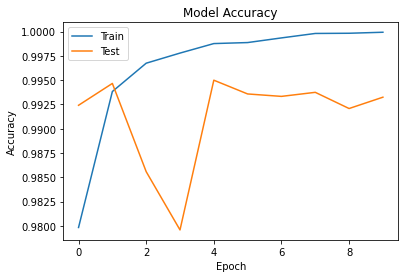

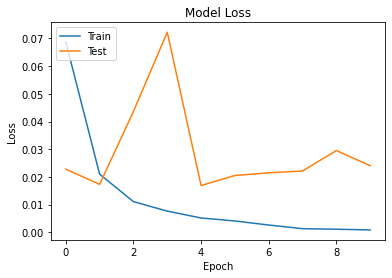

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"], loc="upper left")
plt.show()

In [28]:
predict = model.predict(test_images)
tahmin = pd.DataFrame({'ImageId': [i for i in range(1, 5001)], 'Label': np.argmax(predict, axis = 1)})
tahmin.head()

157/157 [==============================] - 3s 16ms/step


,ImageId,Label
0,1,3
1,2,0
2,3,2
3,4,6
4,5,7


In [30]:
tahmin.columns = ['id', 'label']

In [31]:
tahmin.to_csv('sonuc.csv', index = False)